# Planejamento da solução

-- Objetivo do problema: Previsão do primeiro destino que um novo usuário irá escolher

- Porque?
    - Qual tipo de modelo de negócio do Airbnb?
        - Marketplace ( Conectar pessoas que oferecem acomodacao, com pessoas que estao procurando acomodacao)
        - Oferta ( pessoas oferecendo acomodacao )
            - Tamanho do portfólio.
            - Diversidade/Densidade de Portfólio.
            - Preco Medio
            
        - Demanda ( pessoas procurando acomodacao )
            - Numero de Usuários
            - LTV ( Lifetime Value )
            - CAC ( Client Acquisition Cost )
            
           Gross Revenue = ( Fee*Numero cliente ) - CAC 

#
-- Proposta da Solucao
- Modelo de Predivao do primeiro destino de um novo usario.
- 1.0. Predicoes e salva em tabela do banco de dados. 
- 2.0. API 
    - Input: usuario e suas caracteristicas
    - Output: usuario e suas caracteristicas com a **predicao do destino**
        
--- Esperado 16 ciclos

# 0.0 Imports

In [5]:
import random
import pickle
import pandas   as pd
import seaborn  as sns
from matplotlib import pyplot as plt

from sklearn    import model_selection as ms
from sklearn    import preprocessing   as pp
from sklearn    import metrics         as me
from scikitplot import metrics      as mt

from keras      import models as ml
from keras      import layers as la

## 0.1 Helper Functions

In [6]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.rcParams['font.size'] = 24
    plt.rcParams['figure.dpi'] = 100
    
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    # ignora future warnings
    #warnings.filterwarnings('ignore')
    
    sns.set()
    

## 0.2 Load Data

In [15]:
df_raw = pd.read_csv('../data/raw/train_users_2.csv', low_memory=False)

df6_train = pd.read_parquet('../data/interim/df6_train.parquet')
df6_test = pd.read_parquet('../data/interim/df6_test.parquet')

y_train = pickle.load(open('../data/interim/y_train.pkl', 'rb'))
y_test = pickle.load(open('../data/interim/y_test.pkl', 'rb'))

# 7.0 Machine Learning Modelling

In [8]:
x_train = df6_train.drop('id', axis=1)
x_test = df6_test.drop('id', axis=1)

## 7.1 Baseline Model

In [24]:
df_raw = df_raw.dropna()

cd_list = df_raw['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
cd_weights = df_raw['country_destination'].value_counts(normalize=True).sort_index().tolist()

yhat_random = random.choices(population=cd_list, weights=cd_weights, k=k_num)

len(yhat_random)

13635

### 7.1.1 Baseline Model Performance

Accuracy: 0.5203520352035204
Accuracy: 0.0941706303625225
Accuracy: 0.0033465432656755167
              precision    recall  f1-score   support

          AU       0.02      0.02      0.02        87
          CA       0.02      0.02      0.02       214
          DE       0.01      0.01      0.01       170
          ES       0.02      0.02      0.02       339
          FR       0.06      0.06      0.06       737
          GB       0.03      0.03      0.03       354
          IT       0.04      0.04      0.04       406
          NL       0.01      0.01      0.01       120
          PT       0.00      0.00      0.00        32
          US       0.71      0.71      0.71      9665
       other       0.11      0.11      0.11      1511

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



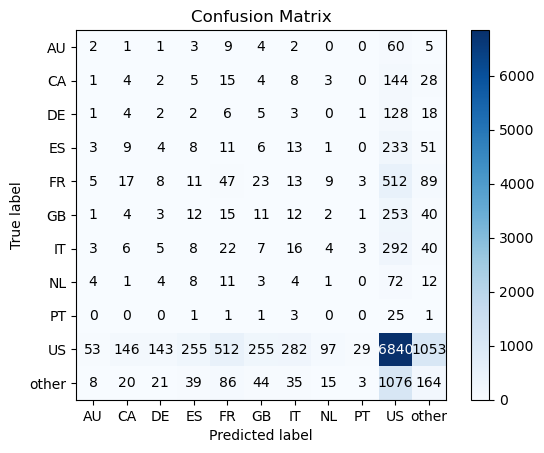

In [26]:
# Accuracy
acc_random = me.accuracy_score(y_test, yhat_random)
print(f'Accuracy: {acc_random}')

# Balanced Accuracy
balanced_acc_random = me.balanced_accuracy_score(y_test, yhat_random)
print(f'Accuracy: {balanced_acc_random}')

# Kappa Metrics
kappa_random = me.cohen_kappa_score(y_test, yhat_random)
print(f'Accuracy: {kappa_random}')

# Classification report
print(me.classification_report( y_test, yhat_random ))

# Confusion Matrix
mt.plot_confusion_matrix(y_test, yhat_random, normalize=False);

## 7.2 Neural Network MLP

In [27]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [28]:
# model definition
model = ml.Sequential()
model.add(la.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(la.Dense(11, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 3s 1ms/step - loss: 1.3322 - accuracy: 0.7051
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.3001 - accuracy: 0.7068
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2526 - accuracy: 0.7072
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2303 - accuracy: 0.7076
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2180 - accuracy: 0.7078
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1939 - accuracy: 0.7079
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1725 - accuracy: 0.7079
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1644 - accuracy: 0.7078
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1562 - accuracy: 0.7080
Epoch 10/100
1705/1705 [==============================] - 2s 1ms/step - l

### 7.2.1 NN Performance

427/427 [==============================] - 1s 1ms/step
Accuracy: 0.7059772643931059
Accuracy: 0.09107469791092679
Accuracy: 0.0001040637659733834


f:\SamuelOliveiraAlvesd\Anaconda3\envs\airbnb_classifier\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\SamuelOliveiraAlvesd\Anaconda3\envs\airbnb_classifier\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\SamuelOliveiraAlvesd\Anaconda3\envs\airbnb_classifier\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        87
          CA       0.00      0.00      0.00       214
          DE       0.00      0.00      0.00       170
          ES       0.00      0.00      0.00       339
          FR       0.22      0.00      0.01       737
          GB       0.00      0.00      0.00       354
          IT       0.00      0.00      0.00       406
          NL       0.00      0.00      0.00       120
          PT       0.00      0.00      0.00        32
          US       0.71      1.00      0.83      9665
       other       0.15      0.00      0.01      1511

    accuracy                           0.71     13635
   macro avg       0.10      0.09      0.08     13635
weighted avg       0.53      0.71      0.59     13635



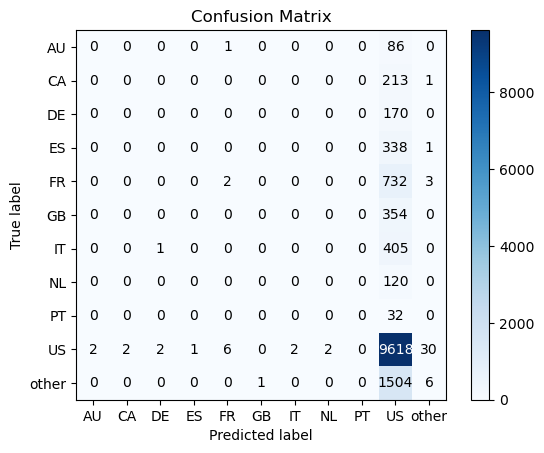

In [29]:
 # prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape( 1, -1 )[0]


# -------------------------- Metrics --------------------------
# Accuracy
acc_nn = me.accuracy_score( y_test_nn, yhat_nn )
print(f'Accuracy: {acc_nn}')

# Balanced Accuracy
balanced_acc_nn = me.balanced_accuracy_score(y_test, yhat_nn)
print(f'Accuracy: {balanced_acc_nn}')

# Kappa Metrics
kappa_nn = me.cohen_kappa_score(y_test, yhat_nn)
print(f'Accuracy: {kappa_nn}')

# Classification report
print(me.classification_report(y_test, yhat_nn))

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False);